In [1]:
import matplotlib as mat              #as mat 추가
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  #추가
import pandas as pd
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:

## 폰트 경로
font_path = 'C:/Users/wjdgu/Desktop/textmining/NanumGothic.ttf'
 
## FontProperties 인스턴스 생성
font_prop = fm.FontProperties(fname=font_path)
 
## 폰트 이름
font_name = font_prop.get_name()
 
## 폰트 일괄 설정
mat.rc('font',family=font_name)

In [3]:
data = pd.read_csv("중복값제거.csv")

In [4]:
#data1 = data[data['keyword'] == '성공 마인드'].index
#data = data.drop(data1)
# 키워드 '성공 마인드', '직무교육' 삭제

data

,Unnamed: 0,content,keyword,site
0,0,라코레 자개공예 와인오프너 특별한 집들이선물로 딱!,공예,네이버
1,1,[삼청동] 서울공예박물관 & 조선김밥,공예,네이버
2,2,이색취미 비즈공예:코바늘뜨기로 시드비즈 목걸이만들기(도안),공예,네이버
3,3,종이공예 눈꽃송이 눈결정체 만들기(도안 포함),공예,네이버
4,4,취미생활추천 지점토 공예 화분 만들기,공예,네이버
...,...,...,...,...
23476,27603,#오늘의뉴스 2021년 1월 14일 1. 코로나 ‘집콕’에 ‘확찐’ 아이들 → 가톨...,아동 교육,블라인드
23477,27605,"이렇게 많이 글을 쓰게 될줄 몰랐네요. 많은 분들이 쪽지주셔서 어딘지 물어보시고, ...",아동 교육,블라인드
23478,27607,"어느날, 별거없는 초등학생 고아 몇 명 앞에 책임감이 투철한 교사가 무릎꿇고 빌게 ...",아동 교육,블라인드
23479,27608,"#오늘의뉴스 2020년 9월7일 1. 당정청, 7조원대 4차 추경 합의 → 전 국민...",아동 교육,블라인드


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23481 non-null  int64 
 1   content     23481 non-null  object
 2   keyword     23481 non-null  object
 3   site        23481 non-null  object
dtypes: int64(1), object(3)
memory usage: 733.9+ KB


In [6]:
#키워드(카테고리)만 list화

keyword = list(set(data['keyword']))
len(keyword)

22

In [7]:
#conents(내용)에 해당하는 부분만 'docs'라는 리스트로 만듦

docs = list(data['content'])

In [8]:
docs

['라코레 자개공예 와인오프너 특별한 집들이선물로 딱!',
 '[삼청동] 서울공예박물관 & 조선김밥',
 '이색취미 비즈공예:코바늘뜨기로 시드비즈 목걸이만들기(도안)',
 '종이공예 눈꽃송이 눈결정체 만들기(도안 포함)',
 '취미생활추천 지점토 공예 화분 만들기',
 '동네에서 선물 받은 박으로 작품 구상중, 박공예 아이디어 공유',
 '공예 트렌드 페어',
 '칠보공예 자격증시험 있었어요',
 '[공지] 마일로브공방 12월 수강생모집 ;낙성대가죽공방, 서울대가죽공방, 가죽공예배우기, 가죽공예, 취미생활',
 '신설동 가죽공예 시장 투어 / 가성비 좋은 크롬 가죽 <레더 에펠>',
 '창문에 유리공예 썬캐쳐 달아주고 홈데코 하기',
 ': 안산 가죽공방 : 가죽공방체험 이색데이트 커플 에어팟케이스 만들기 / 에어팟가죽케이스 원데이클래스 / 수원, 안양, 인천, 시흥, 화성, 안산 / 팍스팩토리 안산 가죽공예',
 '펠트공예 손바느질로 지퍼파우치 만들기(지퍼달기 방법)',
 ' [ 가죽공예/ 오뜨 가죽공방 수강생작품 ]  호피무늬 백팩 (가죽 & 캔버스 ) 만들기 _ ooitw',
 '집순이취미 라탄공예 마크라메 원형 리스만들기 diy ',
 '인천 손바느질로 하는 퀼트공예~~~',
 '봉투로 페이퍼플라워 눈결정 종이꽃 만들기 (종이공예)',
 '가죽공예 마아블링기법 핸드폰케이스만들기~*가죽공예자격증*가죽공예취미*가죽공방창업*평생교육바우처',
 '신설동 가죽공예 부자재 구입 시 주차장 소개 <천일민영주차장>',
 '2021 공예트렌드페어 : 형형색색',
 '은점토공예 기초과정 시작',
 ': 안산 가죽공방 : 타로카드 가죽케이스 만들기 원데이클래스 / 가죽케이스 만들기 / 수원, 안양, 인천, 시흥, 화성, 안산 가죽공예 팍스팩토리 안산 가죽공방',
 '지점토공예 폴리머클레이로 할로윈소품 led캔들홀더 만들기',
 '신도림 가죽공방 가죽공예 아카데미 벨트줄 교체',
 '더쓰임 스튜디오와 함께한 대구 라탄 공예 후기!',
 '이색 취미추천 매듭공예법으로 태슬 만

In [32]:
# keyword 개수 파악
df_data1=data.drop(['Unnamed: 0', ], axis=1)

df_cout = df_data1.groupby(['keyword']).count() 
df_cout

,content,site
keyword,,
개발,1240,1240
공예,680,680
글쓰기,565,565
금융,1130,1130
데이터,1286,1286
드로잉,1516,1516
디자인,1681,1681
베이킹,906,906
부업,1395,1395


<BarContainer object of 22 artists>

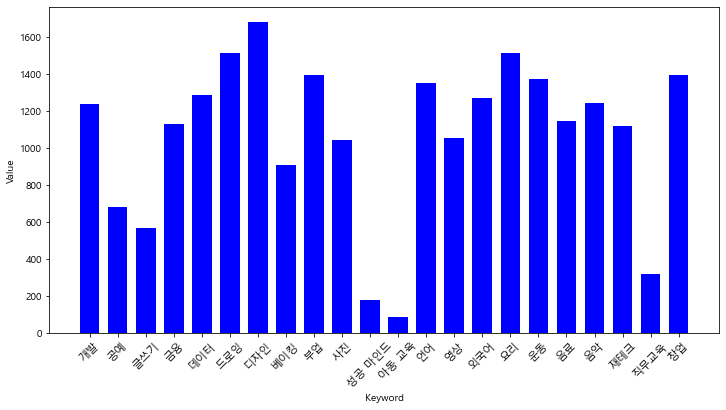

In [48]:
plt.figure(figsize=(12, 6)) #그래프 크기 지정 
xs=df_cout.index.to_list() #dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장 
ys=df_cout['content'].to_list() #dy_day(테이터 프레임)의 volume 필드를 리스트로 저장 

plt.xlabel('Keyword') #그래프 x축 이름(label) 지정 
plt.ylabel('Value') #그래프 y축 이름(label) 지정 
plt.xticks(fontsize=11)
plt.xticks(rotation=45) #레이블 텍스트 회전
plt.bar(xs, ys, width=0.7, color='b') #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯


In [ ]:
xs=df_cout.index.to_list() #dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장 
ys=df_cout['content'].to_list() #dy_day(테이터 프레임)의 volume 필드를 리스트로 저장 

plt.figure(figsize=(12, 6)) #그래프 크기 지정 
plt.xlabel('Keyword') #그래프 x축 이름(label) 지정 
plt.ylabel('Value') #그래프 y축 이름(label) 지정 
plt.xticks(fontsize=11, rotation=45)
plt.xticks(x,xs) #레이블 텍스트 회전
#window ver.
plt.rc("font",family="Malgun Gothic")
plt.bar(xs, ys, width=0.7, color='gray') #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯


# 데이터 전처리

In [ ]:
import re
import requests
from bs4 import BeautifulSoup


from konlpy.tag import Okt 
okt = Okt()

In [ ]:
# http로 시작되는 url제거
remove_url = [re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", str(content)) for content in docs]

# 숫자 제거
remove_num = [re.sub(r'\d+',' ', str(content)) for content in remove_url]

# 영어 제거 
remove_alpha = [re.sub('[a-zA-Z]' , ' ', str(content)) for content in remove_num]

# Hashtag 제거
remove_tag = [re.sub('[#]+[0-9a-zA-Z_]+', ' ', str(content)) for content in remove_alpha]

# 특수문자 제거
remove_special = [re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', str(content)) for content in remove_tag]

#정규식(Regular Expression)이용해서 정규화
lawdata = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in remove_special]


   # 쓰레기 단어 제거
   #text = re.sub('[&]+[a-z]+', ' ', text)

   # 특정 문자 제거
   #for i in ['!','@','#','*'] :
       #new_id = new_id.replace(i, "")

   # 띄어쓰기 제거
   #text = text.replace('\n',' ')

In [ ]:
lawdata[:20]

# 형태소 분석

## tokenized

In [ ]:
#morphs는 형태소 단위로 구문을 분석(형태소 단위로 토크나이즈)

lawdata_tokened_morphs = []

for doc in lawdata:
    newdoc = okt.morphs(doc)
    lawdata_tokened_morphs.append(newdoc)

In [ ]:
lawdata_tokened_morphs[:2]

## stopwords

In [ ]:
## stopwords 파일 불러오기
## open('파일경로.txt', 'rt', encoding='UTF8')
file_path = "/Users/wjdgu/Desktop/textmining/project-main/stopwords-ko.txt"

with open(file_path, 'rt', encoding='UTF8') as f:
    lines = f.read().splitlines()

stop_list = lines

In [ ]:
stop_list

In [ ]:
#한국어 불용어 사전 불러와서 불용어 제거

result = [] 
for w in lawdata_tokened_morphs: 
    if w not in stop_list: 
        result.append(w) 

print(result)

In [ ]:
result

In [ ]:
#리스트 안에 담긴 값(단어모음 형태)들을 각각 문장화

rawdata = []

for doc in result:
    doc2 = ' '.join(doc)
    rawdata.append(doc2)

In [ ]:
rawdata

## 명사 추출 함수 정의

In [ ]:
#명사만 추출하는 함수 정의(토크나이즈해서 명사만 추출)

import string
def noun_process(text):
    nouns = okt.nouns(text)
    #nouns = [word for word in nouns if len(word) > 1]
    return nouns

In [ ]:
print(rawdata[0])
print(noun_process(rawdata[0]))

## TF-IDF

In [ ]:
## 미리 만들어준 명사추출함수(noun_process)를 사용하여, 전체내용(rawdata/문장형태 list) -> 명사만추출 -> 다시문장화(list) 전처리
# 즉, 문장에서 명사만 추출해서 명사로만 이루어진 문장으로 만들어줌

docs_list = [' '.join(noun_process(s)) for s in lawdata]

In [ ]:
## 전처리한 데이터 확인 (명사만 추출되어 문장화 된 형태)
docs_list[:5] 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 2개 미만의 문서(min_df) 또는 90%이상(max_df)에 나타나는 용어는 제외합니다.

# min-df는 DF(document-frequency)의 최소 빈도값을 설정해주는 파라미터  (DF는 특정 단어가 나타나는 '문서의 수')
# 최소 min-dr가 2로 설정되었으니, 특정 단어가 나타나는 문서가 1개밖에 안되는 것들은 모두 탈락


vec = TfidfVectorizer(max_df=0.90, min_df=2 )

In [ ]:
features = vec.fit_transform(docs_list)

# NMF 모델 생성

In [ ]:
type(features)

In [ ]:
print(features)

In [ ]:
from sklearn.decomposition import NMF

#n_topics = 카테고리수

nmf = NMF(n_components=22)
nmf.fit(features)

In [ ]:
# 활성화된 상위 단어를 표시하는 기능
# n_top_words=? (?: 상위 몇개의 단어를 표시할지 결정)

def display_top_words(n_top_words, feature_names, nmf):
    for i, topic_vec in enumerate(nmf.components_):
        print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()


In [ ]:
display_top_words(50, vec.get_feature_names(), nmf)

In [ ]:
##### 각 주제에 대해 활성화된 상위 단어를 표시하는 기능

def topic_table(n_top_words, feature_names, nmf):
    topics = {}
    for i, topic_vec in enumerate(nmf.components_):
        topic_descr = ''
        for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
            topic_descr = topic_descr + feature_names[fid] + " "
        topics[i] = topic_descr
    return pd.DataFrame({'Top_Topic_Terms': topics})


# 각 카테고리별로 가장많이 등장한 상위 단어 15개(15terms)
topic_df = topic_table(15, vec.get_feature_names(), nmf)


In [ ]:
topic_df

In [ ]:
# Manually label topics
# 위에 데이터에 맞게 label topics 임의분류 (위에 표의 순서에 맞게, 묶여진 클러스터별로 topic 이름을 부여해줌)

topic_df['Label'] =['공예', '성공 마인드', '운동', '부업', '아동 교육', '영상', '사진', '재테크', '요리', '개발', '데이터', '드로잉', '글쓰기', '음악', '직무 교육', '언어', '금융', '베이킹', '창업', '음료', '외국어','디자인']

In [ ]:
topic_df

In [ ]:
#'다이어트 메뉴 샐러드 파스타 레시피' 이라는 글을 모델에 넣었을때, 8번째(요리) 카테고리가 출력되는 것 확인
new_review = ['다이어트 메뉴 샐러드 파스타 레시피']
nmf.transform(vec.transform(new_review)).argsort(axis=1)[:,-1]

# 클러스터링한 데이터가 얼마나 잘 묶여졌는지 정확도 확인(참고)

In [ ]:
#(문서,단어) 형태이다.

print(features.shape)

In [ ]:
type(features)

In [ ]:
# NMF를 적용하기 위해서는 term-document matrix가 필요하다.
# 즉, 현재의 Matrix를 transposed matrix(전치행렬)로 바꿔줘야 함.
# compressed sparse(희소행렬: 행렬의 값이 대부분 0일때) row matrix인 docs를 transpose 한다. (행열바꾸기 -> (단어, 글) 형태의 matrix로)

features_trans = features.transpose()
type(features_trans) 

print('Shape of Sparse Matrix: ', features_trans.shape)
print('Amount of Non-Zero occurrences: ', features_trans.nnz)

In [ ]:
nmf = NMF(n_components=22)
nmf.fit(features_trans)

In [ ]:
H = nmf.components_

In [ ]:
#shpae 형식 = (클러스터개수, document 개수)
H.shape

In [ ]:
# index 0번 문서의 클러스터링 결과 점수

print(H[:,0])

In [ ]:
# 전체 글에 대해서 어떤 index(클러스터)가 best인지 출력

pred_labels = H.argmax(axis=0)

In [ ]:
# label예측한 글 개수 = 원래 글 개수

len(pred_labels)

In [ ]:
#10번째글까지 예측한 각 글에 대한 label 번호 (각 글에대한 best 값이다!)

pred_labels[:10]

In [ ]:
# 원래데이터를 'keywords'열 기준으로 소팅 -> 'keywords'열만 뽑아서 'target'에 저장
data_sorted = data.sort_values('keyword')

target = list(data_sorted["keyword"])
print(target)

In [ ]:
# 'target'값(문자열)을 순서대로 '0 ~ 21'와 같은 숫자형으로 변환
# 즉, num_target이 실제 정답 list 이다.

num_target = []

for i in target:
    temp = i.replace('개발','0').replace('공예','1').replace('글쓰기','2').replace('금융','3').replace('데이터','4').replace('드로잉','5').replace('디자인','6').replace('베이킹','7').replace('부업','8').replace('사진','9').replace('성공 마인드','10').replace('아동 교육','11').replace('언어','12').replace('영상','13').replace('외국어','14').replace('요리','15').replace('운동','16').replace('음료','17').replace('음악','18').replace('재테크','19').replace('직무교육','20').replace('창업','21')
    num_target.append(int(temp))
    
print(num_target)

In [ ]:
# 글숫자 맞음
len(num_target)

In [ ]:
from sklearn.metrics import confusion_matrix

#가로: 예측 클러스터 / 세로: 실제 클래스
pd.DataFrame(confusion_matrix(num_target, pred_labels))

In [ ]:
cmatrix = confusion_matrix(num_target, pred_labels)

In [ ]:
list(cmatrix.argmax(axis=0))

In [ ]:
# best_label로 매칭했을 때 전체 클러스터링 정확도 계산 위해서 

best_labels = list(cmatrix.argmax(axis=0))
print(best_labels)

In [ ]:
#전체 클러스터링 정확도 계산 과정(성능확인)

i = 0
sum_result = 0
for c in cmatrix.transpose():
    i += 1
    sum_result += c[best_labels[i]]

In [ ]:
# 맞은데이터 개수

print(sum_result)

In [ ]:
# 맞은 비율

sum_result/len(num_target)

In [ ]:
print(target)

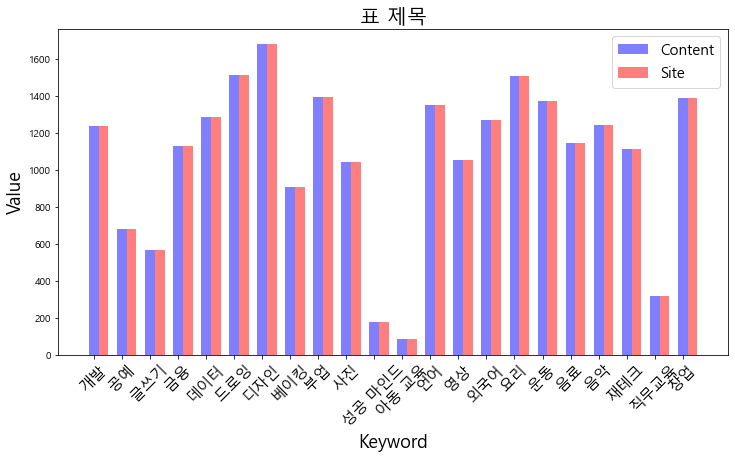

In [47]:
 # 예측데이터와 비교

plt.figure(figsize=(12, 6)) #그래프 크기 지정 

x=np.arange(len(xs))
bar_width = 0.35

p1 = plt.bar(x, df_cout['content'].to_list(), bar_width, color='b', alpha=0.5, label='Content')
p2 = plt.bar(x+bar_width, df_cout['site'].to_list(), bar_width, color='r', alpha=0.5, label='Site') #예측데이터


plt.title('표 제목', fontsize=20)
plt.ylabel('Value', fontsize=18)
plt.xlabel('Keyword', fontsize=18)
plt.xticks(x, xs, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), ('Content', 'Site'), fontsize=15)
plt.show()

# 신규 데이터로 Test

In [15]:
#오늘일기에 작성된 글(전처리 과정 거침)을 list로 불러옴

from csv import reader

with open('testdata_list.csv', 'r', encoding='UTF-8') as csv_file:
    csv_reader = reader(csv_file)
    # Passing the cav_reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)
    print(list_of_rows)

[['일과', '새벽', '식사', '준비', '등원', '등교', '준비', '집', '아침', '디즈니', '스타워즈', '청소', '설거지', '점심', '후다닥', '케이크', '사고', '책', '반납', '및', '대여', '애', '다시', '저녁', '식사', '후', '설거지', '정리', '방학', '기념', '케이크', '오늘', '방학', '날', '월', '일', '어', '두운', '날', '두', '아이', '벌써', '뭘', '하나', '걱정', '마음', '오늘', '아이', '위해', '동선', '상의', '케이크', '가게', '검색', '후', '출발', '너도밤나무', '제과점', '이름', '곳', '종류', '처음', '케이크', '가게', '홀', '케이크', '손', '점원', '무엇', '영어', '말', '제일', '인기', '건', '사진', '앞쪽', '거기', '초코', '코팅', '고심', '끝', '그', '두', '가지', '독일', '통방', '치즈', '케이크', '를', '역시', '종이', '포장', '환경', '진심', '사람', '년', '전통', '곳', '내', '고민', '공', '내', '봉투', '뭐', '독일인', '할아버지', '대체', '뭘', '한국', '문화원', '기존', '대여', '도서', '반납', '책', '한국', '책갈피', '트리', '장식', '혼자', '전시', '눈길', '둘', '틈', '대중', '교통', '어제', '오늘', '조금', '눈', '지하철', '선택', '알', '아들', '수', '안내', '방송', '출발', '간다', '하교', '시간', '늦', '것', '연락', '남편', '답', '주변', '람', '영어', '못', '지하철', '독일', '생활', '최초', '택시', '로', '무사', '도착', '방학', '기념', '케이크', '시식', '나이테', '켜', '바움쿠헨', '맛', '밀도', '식감', '도', '

In [ ]:
#전처리 완료된 test글을 문장화

test_data = ' '.join(list_of_rows[0])

In [ ]:
#해당 글을 nmf모델에 적용

new = [test_data]
label = nmf.transform(vec.transform(new)).argsort(axis=1)[:,-1][0]
label

In [ ]:
# 모델에 따라서 묶여진 클러스터에 부여한 topic 이름을 가져옴
# test_data로 넣어준'오늘일기'와 비슷한 클러스터에 부여된 topic 이름을 출력함

pred_topic = topic_df['Label'][label]
pred_topic

<Figure size 432x288 with 0 Axes>

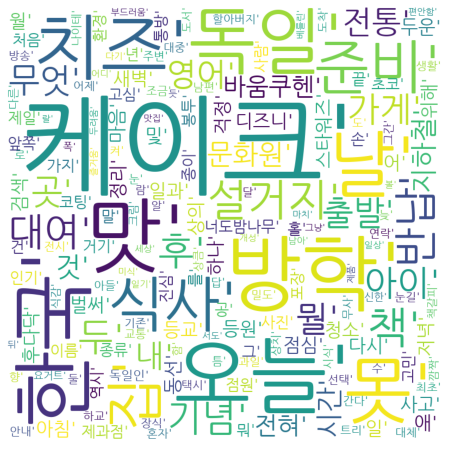

In [29]:
#시각화

wc1 = WordCloud(max_font_size=200, font_path = 'C:/Users/wjdgu/Desktop/textmining/NanumGothic.ttf', # 폰트 위치
                background_color='white', width=800, height=800)

wc1.generate(" ".join(str(s) for s in list_of_rows)) # list를 str으로 변환

plt.tight_layout(pad=0)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wc1)
plt.show()

# 클래스101 강의 가져오기

In [ ]:
### 참고사이트: https://coding-kindergarten.tistory.com/91

#step1.selenium 패키지와 time 모듈 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from numpy import random

## 강의 추천 시스템 함수

In [ ]:
def class_recommend(query):
    #크롬드라이버로 url로 접속
    url = 'https://class101.net/categories/'
    driver = webdriver.Chrome('/Users/parkjuhyeon/chromedriver')  ##크롬드라이버가 설치된 위치
    driver.get(url)
    time.sleep(3)
    
    #검색창에 키워드 입력 후 엔터
    search_box = driver.find_element_by_css_selector(".SearchInput__Input-go705p-2.bxkgtv")
    search_box.send_keys(query)
    search_box.send_keys(Keys.RETURN)
    time.sleep(2)
    
    
    # 결과 화면에서 강의명과 url 추출
    titles = driver.find_elements_by_css_selector(".Card__Title-sc-1esp5o0-4.bVCpyh")
    hrefs = driver.find_elements_by_css_selector(".ProductCardfragment__HoverStyledLink-sc-1cja13i-0.bzmYOj")
    titles_list =[]
    hrefs_list =[]
    for i in titles:
        title = i.text
        titles_list.append(title)
    
        for a in hrefs:
            href = a.get_attribute('href')
            if (href not in hrefs_list) :
                hrefs_list.append(href)

    ### 강의명, 링크 데이터프레임으로 만들기            
    data = {"class_title" : titles_list, "link" : hrefs_list}
    df = pd.DataFrame(data)
    
    return df

In [ ]:
## 입력받은 query(예측한 라벨)에 대한 강의를 랜덤으로 3개 가져옴
class_recommend(pred_topic).sample(n=3)